In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

### Importing data

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')
data = pd.DataFrame(train_data)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Feature Engineering for Train Data

In [4]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
data.dropna(inplace = True)

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

In [7]:
data["Journy_day"] = pd.to_datetime(data.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [8]:
data["Journy_month"] = pd.to_datetime(data.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [9]:
data.drop(['Date_of_Journey'],axis =1, inplace = True)

In [10]:
data["Dep_hour"] = pd.to_datetime(data.Dep_Time).dt.hour

In [11]:
data["Dep_min"] = pd.to_datetime(data.Dep_Time).dt.minute

In [12]:
data.drop(['Dep_Time'],axis =1, inplace = True)

In [13]:
data["Arr_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arr_min"] = pd.to_datetime(data.Arrival_Time).dt.minute
data.drop(['Arrival_Time'],axis =1, inplace = True)

In [14]:
duration = list(data.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [15]:
data['Dur_hours'] = duration_hours
data['Dur_mins'] = duration_mins
data.drop(['Duration'],axis =1, inplace = True)

In [16]:
data.replace({"non-stop" : 0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)

In [17]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hours,Dur_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

In [18]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [19]:
#sbn.catplot(y = "Price", x = "Airline", data = data.sort_values("Price",ascending= False),kind='strip')
#plt.show()

In [20]:
Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

In [21]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [22]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [23]:
Source = data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

In [24]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True)

In [27]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
data.drop(["Route", "Additional_Info"],axis = 1, inplace = True)

In [29]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hours,Dur_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [30]:
data_train = pd.concat([data,Airline,Source,Destination], axis = 1)

In [31]:
data_train.drop(['Airline','Source','Destination'], axis = 1, inplace = True)

In [32]:
data_train.head()

,Total_Stops,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hours,Dur_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## Feature Engineering for Test Data

In [33]:
test_data = pd.read_excel('Test_Set.xlsx')
t_data = pd.DataFrame(test_data)
t_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [34]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [35]:
t_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## EDA

In [36]:
t_data["Journy_day"] = pd.to_datetime(t_data.Date_of_Journey, format = "%d/%m/%Y").dt.day
t_data["Journy_month"] = pd.to_datetime(t_data.Date_of_Journey, format = "%d/%m/%Y").dt.month
t_data.drop(['Date_of_Journey'],axis =1, inplace = True)
t_data["Dep_hour"] = pd.to_datetime(t_data.Dep_Time).dt.hour
t_data["Dep_min"] = pd.to_datetime(t_data.Dep_Time).dt.minute
t_data.drop(['Dep_Time'],axis =1, inplace = True)

t_data["Arr_hour"] = pd.to_datetime(t_data.Arrival_Time).dt.hour
t_data["Arr_min"] = pd.to_datetime(t_data.Arrival_Time).dt.minute
t_data.drop(['Arrival_Time'],axis =1, inplace = True)

duration = list(t_data.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
t_data['Dur_hours'] = duration_hours
t_data['Dur_mins'] = duration_mins
t_data.drop(['Duration'],axis =1, inplace = True)

t_data.replace({"non-stop" : 0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)

In [37]:
t_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hours,Dur_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,24,6,23,55,2,45,2,50


In [38]:
t_data["Airline"].value_counts()
t_Airline = t_data[["Airline"]]
t_Airline = pd.get_dummies(Airline, drop_first= True)

t_data["Source"].value_counts()

t_Source = t_data[["Source"]]
t_Source = pd.get_dummies(Source, drop_first= True)

t_data["Destination"].value_counts()
t_Destination = t_data[["Destination"]]
t_Destination = pd.get_dummies(Destination, drop_first= True)

t_data.drop(["Route", "Additional_Info"],axis = 1, inplace = True)

data_test = pd.concat([t_data,t_Airline,t_Source,t_Destination], axis = 1)
data_test.drop(['Airline','Source','Destination'], axis = 1, inplace = True)
data_test.head()

,Total_Stops,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hours,Dur_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0,...,0,0,0,0,0,0,0,0,0,1


## Feature Selection

Following are some of the feature selection methods

1. heat map
2. feaure_importance
3. selectKBest

In [39]:
data_train.shape

(10682, 30)

In [40]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journy_day', 'Journy_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Dur_hours', 'Dur_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [41]:
X = data_train.loc[:,['Total_Stops', 'Journy_day', 'Journy_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Dur_hours', 'Dur_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hours,Dur_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [43]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hours,Dur_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


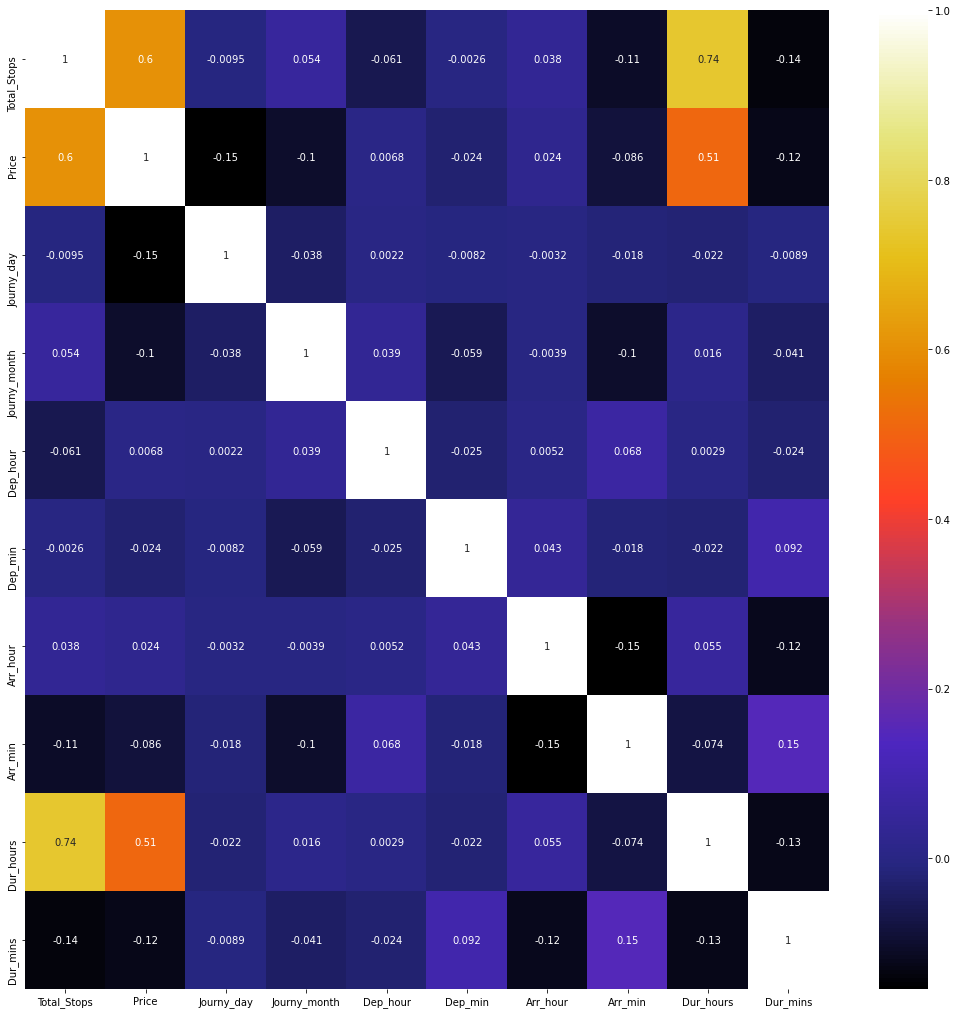

In [44]:
plt.figure(figsize = (18,18))
sbn.heatmap(data.iloc[:,3:].corr(), annot = True, cmap = plt.cm.CMRmap)
plt.show()

In [45]:
# Important features using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [46]:
print(selection.feature_importances_)

[2.12957159e-01 1.44281180e-01 5.35705494e-02 2.37121748e-02
 2.08185613e-02 2.79853772e-02 1.88443449e-02 1.27373411e-01
 1.79493571e-02 1.03935197e-02 1.78673912e-03 1.51114370e-02
 1.44978160e-01 6.79459942e-02 2.02782292e-02 8.66632928e-04
 2.62591867e-03 1.25261271e-04 5.15731638e-03 8.59114411e-05
 5.67827438e-04 1.56114371e-02 3.11227991e-03 7.13744887e-03
 7.42517675e-03 1.60451345e-02 7.50990564e-03 4.94199156e-04
 2.52493568e-02]


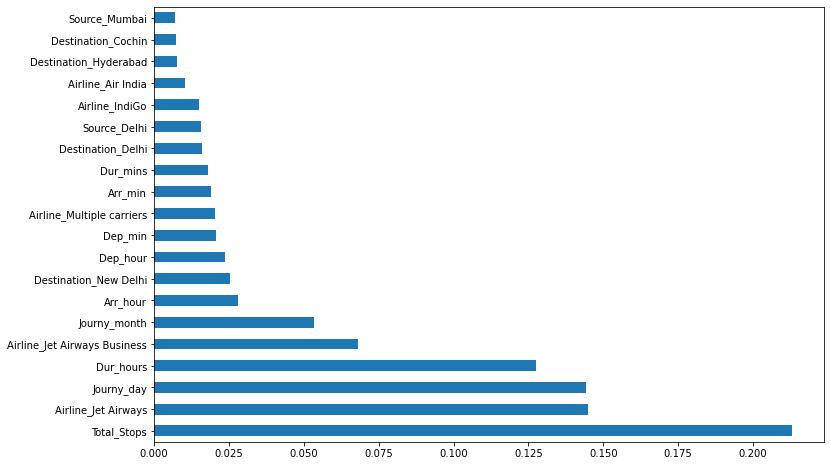

In [47]:
# plot graph for feature importances
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

## Fitting Model with Random Forest

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
y_pred = reg_rf.predict(X_test)

In [51]:
reg_rf.score(X_train, y_train)

0.9550690129218046

In [52]:
reg_rf.score(X_test, y_test)

0.8135917488489377

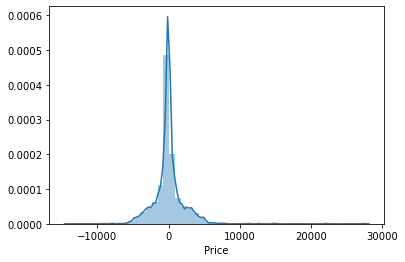

In [55]:
sbn.distplot(y_test-y_pred)
plt.show()

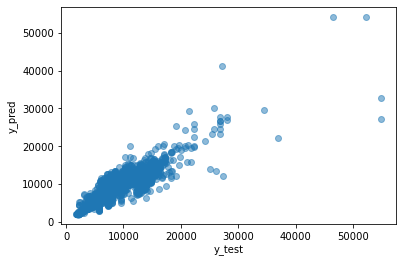

In [56]:
plt.scatter(y_test, y_pred, alpha= 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1240.8073638799588
MSE: 4373729.412319761
RMSE: 2091.3463157305537


In [58]:
metrics.r2_score(y_test, y_pred)

0.8135917488489377

## Hyperparameter Tuning

1. RandomizedSearchCV
2. GridSearchCV

In [59]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [62]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter= 10, cv= 5,verbose= 2, random_state= 42, n_jobs= 1)

In [65]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [67]:
prediction = rf_random.predict(X_test)

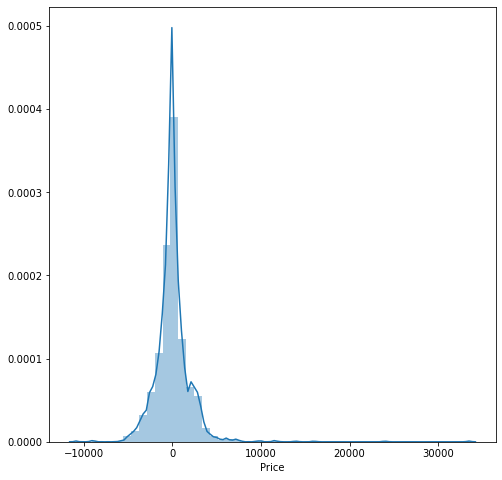

In [69]:
plt.figure(figsize=(8,8))
sbn.distplot(y_test-prediction)
plt.show()

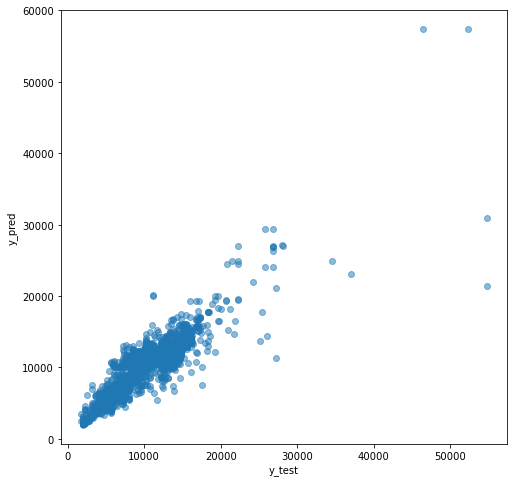

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, prediction, alpha= 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1203.91890794654
MSE: 4052993.4456917695
RMSE: 2013.2047699356788


## Save the model to reuse it again

In [77]:
import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)

In [78]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [79]:
y_prediction = forest.predict(X_test)

In [80]:
metrics.r2_score(y_test, y_prediction)

0.8272615086772346